In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic=sns.load_dataset('titanic')
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


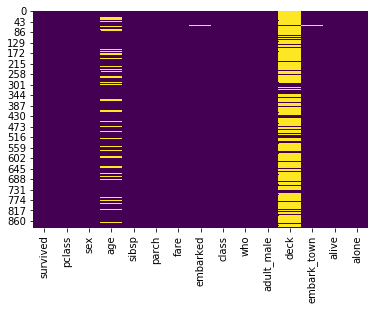

In [3]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

In [4]:
titanic['age']=titanic['age'].fillna(titanic['age'].mean())

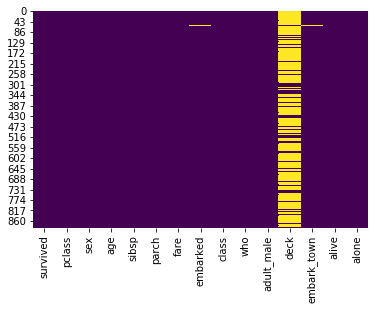

In [5]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

In [6]:
titanic['embarked']=titanic['embarked'].fillna(titanic['embarked'].mode()[0])

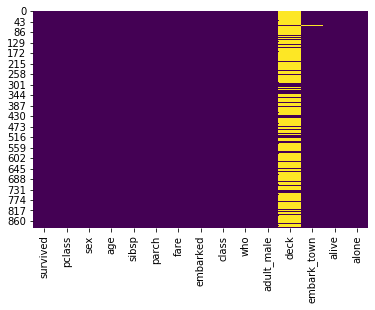

In [7]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

In [8]:
titanic.drop(labels=['deck','embark_town','alive','class'],inplace=True, axis=1)

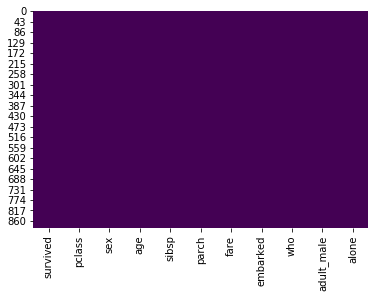

In [9]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

In [10]:
titanic['fare']=titanic['fare'].astype('int')
titanic['age']=titanic['age'].astype('int')
titanic['pclass']=titanic['pclass'].astype('int')

In [11]:
genders={'male':0,'female':1}
titanic['sex']=titanic['sex'].map(genders)

In [12]:
who={'man':0,'woman':1,'child':3}
titanic['who']=titanic['who'].map(who)

In [13]:
adult_male={True:1, False:0}
titanic['adult_male']=titanic['adult_male'].map(adult_male)

In [14]:
alone={True:1, False:0}
titanic['alone']=titanic['alone'].map(alone)

In [15]:
ports={'S':0,'C':1,'Q':2}
titanic['embarked']=titanic['embarked'].map(ports)

In [16]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,0,22,1,0,7,0,0,1,0
1,1,1,1,38,1,0,71,1,1,0,0
2,1,3,1,26,0,0,7,0,1,0,1
3,1,1,1,35,1,0,53,0,1,0,0
4,0,3,0,35,0,0,8,0,0,1,1


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [32]:
X=titanic.drop(labels=['survived'],axis=1)
y=titanic['survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=42)

In [33]:
model=LogisticRegression(solver='lbfgs', max_iter=400)
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

In [34]:
model.score(X_test, y_test)

0.8305084745762712